In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Diwali Sales Data.csv',encoding='unicode escape')
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [4]:
df.shape

(11251, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [8]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
df.shape

(11251, 13)

In [11]:
df.dropna(inplace=True)

In [12]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [13]:
df.shape

(11239, 13)

In [14]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

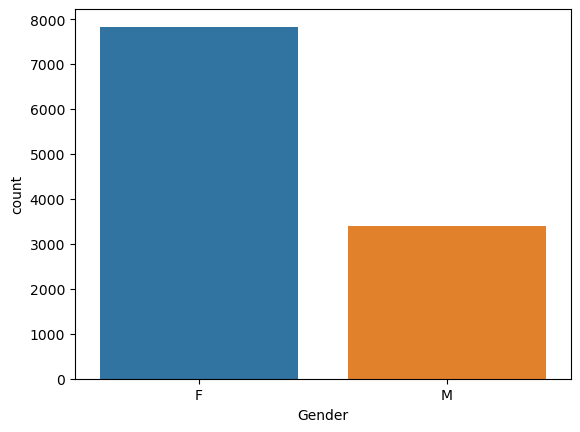

In [15]:
# Data analysis

sales_gender = sns.countplot(x='Gender',data=df)

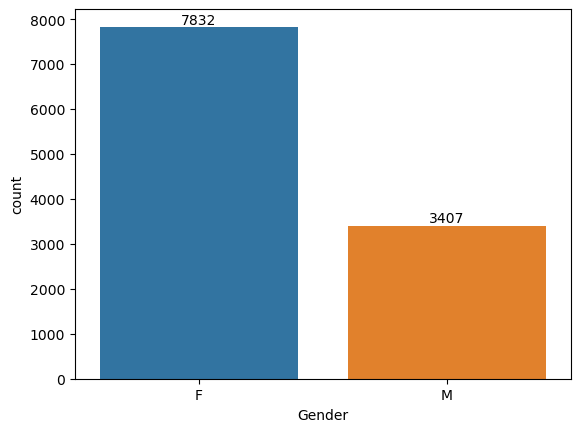

In [16]:
sales_gender = sns.countplot(x='Gender',data=df)

for i in sales_gender.containers:
    sales_gender.bar_label(i)

In [19]:
sales_gen_amt = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sales_gen_amt

,Gender,Amount
0,F,74335856.43
1,M,31913276.00


<AxesSubplot:xlabel='Gender', ylabel='Amount'>

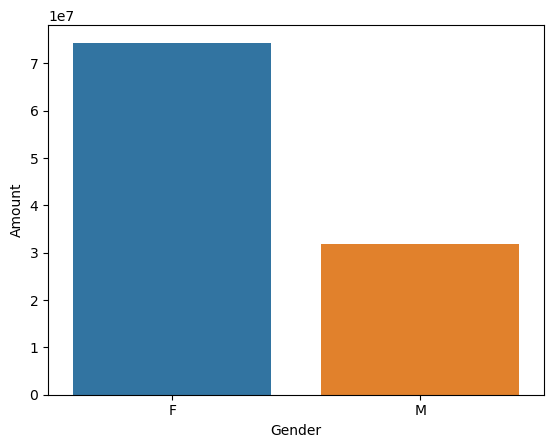

In [20]:
sns.barplot(x='Gender',y='Amount',data=sales_gen_amt)

# From above graph we can see that most of the buyers are females and even the purchasing power of females are greater than male

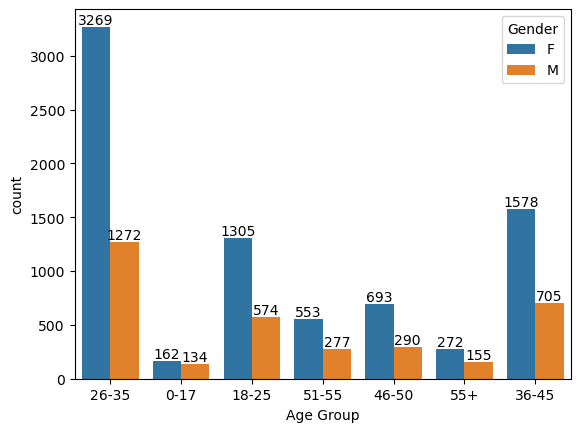

In [22]:
# Data Analysis according to age group

count_age_group = sns.countplot(x='Age Group',data=df,hue='Gender')

for i in count_age_group.containers:
    count_age_group.bar_label(i)

In [27]:
sales_age_group = df.groupby(['Age Group','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sales_age_group

,Age Group,Gender,Amount
4,26-35,F,30963954.94
6,36-45,F,15509957.49
2,18-25,F,11887003.00
5,26-35,M,11649489.00
8,46-50,F,6743393.00
7,36-45,M,6635038.00
10,51-55,F,5385208.00
3,18-25,M,5353729.00
11,51-55,M,2876269.00
9,46-50,M,2464451.00


<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

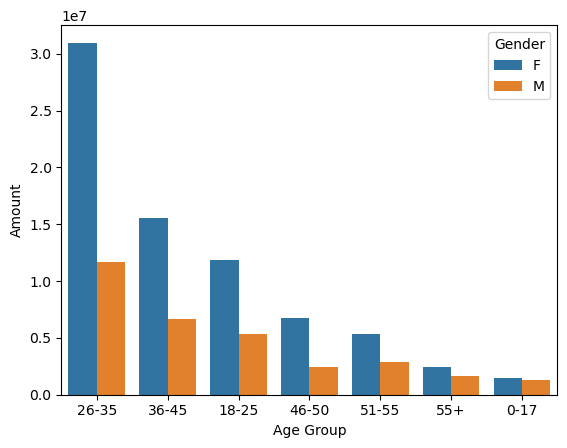

In [28]:
sns.barplot(x='Age Group',y='Amount',data=sales_age_group,hue='Gender')

# From above graph we can see that most of the buyers are of age group between 26-35 yrs females

In [33]:
# Data Analysis according to state

sales_state = df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sales_state

,State,Amount
14,Uttar Pradesh,19374968.00
10,Maharashtra,14427543.00
7,Karnataka,13523540.00
2,Delhi,11603819.45
9,Madhya Pradesh,8101142.00
0,Andhra Pradesh,8037146.99
5,Himachal Pradesh,4963368.00
4,Haryana,4220175.00
1,Bihar,4022757.00
3,Gujarat,3946082.00


<AxesSubplot:xlabel='Amount', ylabel='State'>

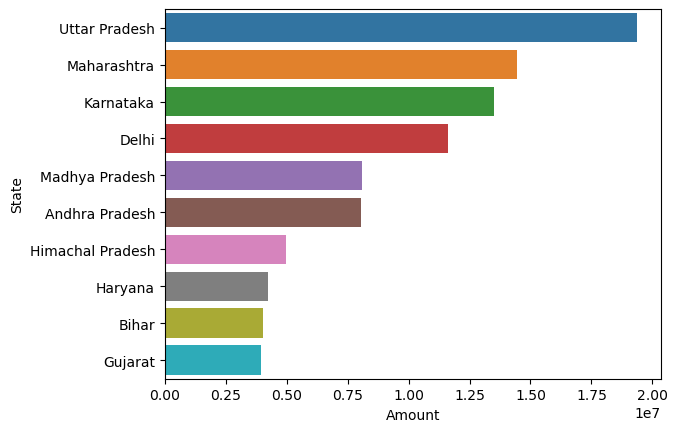

In [34]:
sns.barplot(y='State',x='Amount',data=sales_state)

# From above graph we can see that most of the orders and total sales are from Utter pradesh,Maharashtra,Karnataka respectively

In [41]:
# Data Analysis according to marital status

sales_marital_status = df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sales_marital_status

,Marital_Status,Gender,Amount
0,0,F,43786648.44
2,1,F,30549207.99
1,0,M,18338738.00
3,1,M,13574538.00


<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

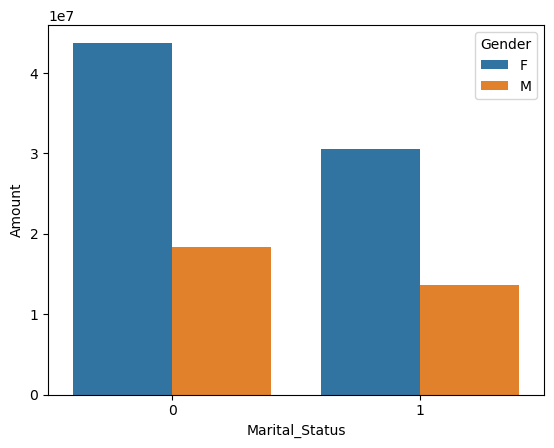

In [40]:
sns.barplot(x='Marital_Status',y='Amount',data=sales_marital_status,hue='Gender')

# From above graph we can see that most of the buyers are married(women) and they have high purchasing power

In [43]:
# Data Analysis according to occupation

sales_occupation = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sales_occupation

,Occupation,Amount
10,IT Sector,14755079.00
8,Healthcare,13034587.49
2,Aviation,12602298.00
3,Banking,10770610.95
7,Govt,8517212.00
9,Hospitality,6376405.00
12,Media,6295832.99
1,Automobile,5368596.00
4,Chemical,5297436.00
11,Lawyer,4981665.00


<AxesSubplot:xlabel='Amount', ylabel='Occupation'>

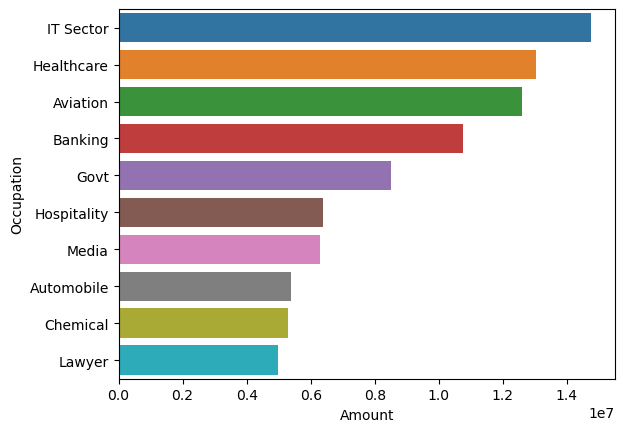

In [45]:
sns.barplot(y='Occupation',x='Amount',data=sales_occupation)

# From above graph we can see that most of the buyers are from IT sector,Halthcare,Aviation

In [46]:
# Data Analysis according to product_category

sales_product_category= df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sales_product_category

,Product_Category,Amount
6,Food,33933883.50
3,Clothing & Apparel,16495019.00
5,Electronics & Gadgets,15643846.00
7,Footwear & Shoes,15575209.45
8,Furniture,5440051.99
9,Games & Toys,4331694.00
14,Sports Products,3635933.00
1,Beauty,1959484.00
0,Auto,1958609.99
15,Stationery,1676051.50


<AxesSubplot:xlabel='Amount', ylabel='Product_Category'>

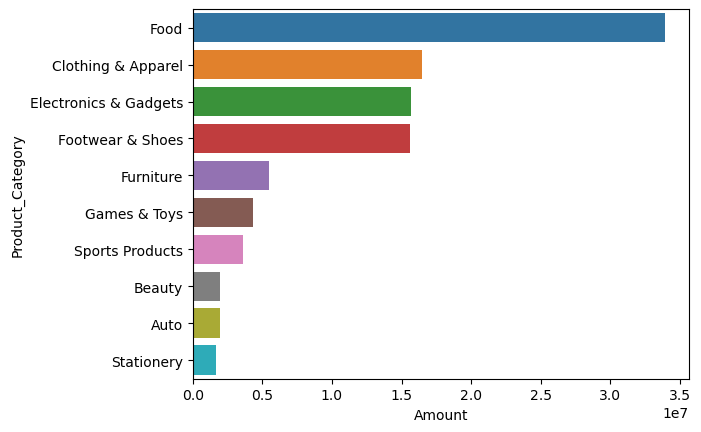

In [48]:
sns.barplot(y='Product_Category',x='Amount',data=sales_product_category)

# From above graph we can see that most of the buyers are from Food,Clothing&Apparel,Electronic&Gadgets

# Conclusion
# Married women age group 26-35 yrs from UP,MH,KN working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing&Apparel, Electronic&Gadgets category